In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("Online Payment Fraud Detection.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [3]:
data.shape

(1048575, 10)

In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [5]:
# some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [7]:
data['type'].unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
1048570    CASH_OUT
1048571     PAYMENT
1048572     PAYMENT
1048573     PAYMENT
1048574     PAYMENT
Name: type, Length: 1048575, dtype: object>

In [8]:
# exploring transaction type
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [10]:
data.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0          1
36    TRANSFER  905603.00   C423975596   0.00           0.00            C1100623151  4177319.93      5082922.93      0          1
                894268.50   C99378030    5722.00        0.00            C422190810   165912.86       1060181.36      0          1
                895884.24   C1251466022  17.00          0.00            C640389679   71231.53        1673435.04      0          1
                896864.10   C1486519965  116786.00      0.00            C1778563682  295361.22       1324963.34      0          1
                                                                                                                               ..
17    CASH_IN   38255.47    C1787940699  3406033.32     3444288.79      C1999837656  2236543.16

In [11]:
data.value_counts('isFraud')

isFraud
0    1047433
1       1142
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


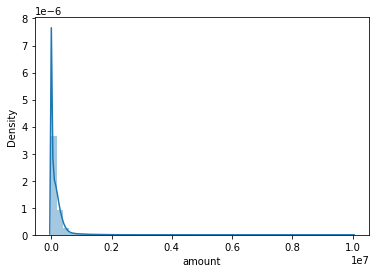

In [12]:
#univariate analysis
sns.distplot(data['amount']);

<AxesSubplot:xlabel='type', ylabel='count'>

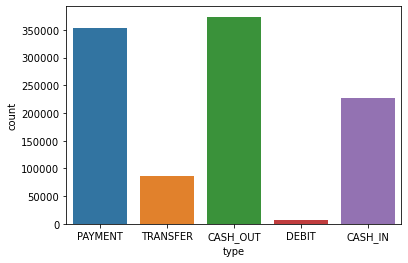

In [13]:
sns.countplot(x='type', data=data)

In [14]:
# show Correlation
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


In [15]:
#let’s transform the categorical features into numerical
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [16]:
data['type'] = labelencoder.fit_transform(data['type'])
print(data['type'])

0          3
1          3
2          4
3          1
4          3
          ..
1048570    1
1048571    3
1048572    3
1048573    3
1048574    3
Name: type, Length: 1048575, dtype: int32


In [17]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,3,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,3,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,3,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


<AxesSubplot:xlabel='type', ylabel='amount'>

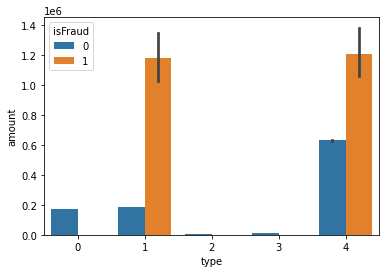

In [18]:
sns.barplot(x='type',y='amount',hue='isFraud', data=data)

In [23]:
# Split data into dependent and independent variables

x=data[['type','amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=data[['isFraud']]

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)


In [25]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()
Model.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
prediction= Model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,prediction)
score

0.8737982037087481

In [30]:
from sklearn.ensemble import RandomForestClassifier
Model_2= RandomForestClassifier()
Model_2.fit(x_train,y_train)

C:\Users\Tosin Olaniregun\AppData\Local\Temp\ipykernel_6196\1562086065.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model_2.fit(x_train,y_train)


RandomForestClassifier()

In [32]:
prediction2= Model_2.predict(x_test)
prediction2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
score_2 = roc_auc_score(y_test,prediction2)
score_2

0.8466857764015844